<a href="https://colab.research.google.com/github/lapatradaa/BSC_DPDM23/blob/main/Classificationmin__impurity_decrease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3

ให้แต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน parameters ให้ และ มาอธิบาย parameter ของตัวเอง ว่ามันคืออะไร

- แถว 4 min_impurity_decrease

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading data file
credit = pd.read_csv('/content/drive/MyDrive/bsc_dpdm23/Copy of crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0})

In [ ]:
credit = credit[['a9','a10','a12','a13','a16']]

In [ ]:
credit

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,1
4,1,0,0,3,1
...,...,...,...,...,...
685,0,0,0,1,0
686,0,1,1,1,0
687,0,1,1,1,0
688,0,0,0,1,0


In [ ]:
credit.head()

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,1
4,1,0,0,3,1


In [ ]:
count_0 = (credit == 0).sum()
count_1 = (credit == 1).sum()
print("0")
print(count_0)

print("1")
print(count_1)


0
a9     329
a10    395
a12    374
a13      0
a16    383
dtype: int64
1
a9     361
a10    295
a12    316
a13    625
a16    307
dtype: int64


In [ ]:
np.random.seed(seed=1)

In [ ]:
a = np.random.randint(2, size=len(credit))

In [ ]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [ ]:
train = credit[a == 1]
train.shape

(324, 5)

In [ ]:
balance_data = credit[a == 0]
balance_data.shape

(366, 5)

In [ ]:
#Seperating the Target variable
X = balance_data.values[:,:-1]
Y = balance_data.values [:,-1]

In [ ]:
#Splitinq Dataset into Test and Train
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size= 0.3, random_state= 100)

In [ ]:
clf_entropy= DecisionTreeClassifier (criterion = "entropy", random_state= 100,max_depth=3)
clf_entropy.fit (x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [ ]:
#FunctiontomakePredictions
y_pred_en = clf_entropy.predict (x_test)
print(y_pred_en)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0]


In [ ]:
#Checking Accuracy
print ("Accuracy is ", accuracy_score (y_test,y_pred_en)*100)

Accuracy is  88.18181818181819


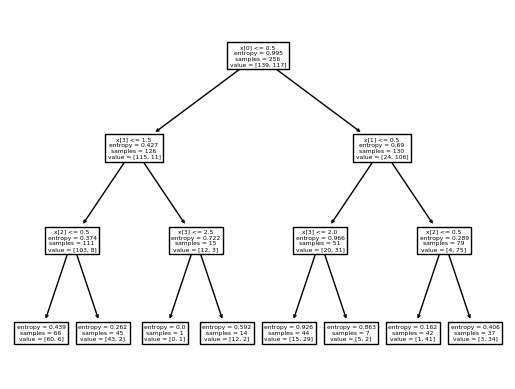

In [ ]:
tree.plot_tree(clf_entropy);

In [ ]:
#Function to perform training with Entropy
clf_entropy1= DecisionTreeClassifier (criterion = "entropy", random_state= 100,max_depth=2, min_samples_leaf=4)
clf_entropy1.fit (x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=4,
                       random_state=100)

In [ ]:
#FunctiontomakePredictions
y_pred_en1 = clf_entropy1.predict (x_test)
print(y_pred_en1)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]


In [ ]:
#Checking Accuracy
print ("Accuracy is ", accuracy_score (y_test,y_pred_en1)*100)

Accuracy is  89.0909090909091


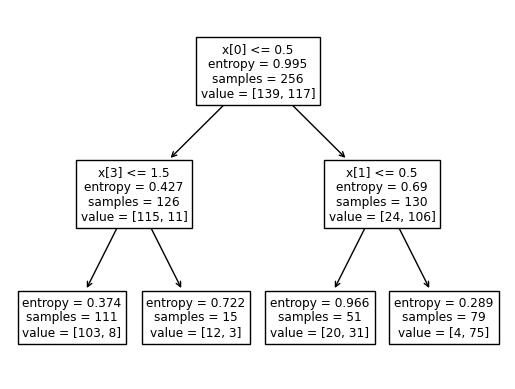

In [ ]:
tree.plot_tree(clf_entropy1);

## Set parameter use min_impurity_decrease

In [ ]:
Clf_min_impurity = DecisionTreeClassifier(min_impurity_decrease=0)

In [ ]:
Clf_min_impurity.fit(x_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0)

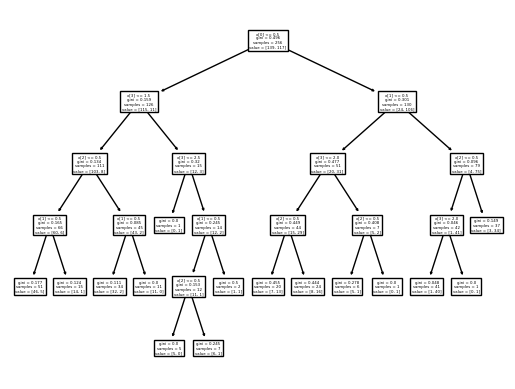

In [ ]:
tree.plot_tree(Clf_min_impurity);

In [ ]:
y_pred_mpd = Clf_min_impurity.predict (x_test)
print(y_pred_mpd)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]


In [ ]:
#Checking Accuracy
print ("Accuracy of 0 is", accuracy_score (y_test,y_pred_mpd)*100)

Accuracy of 0 is 88.18181818181819


###ต้นที่ 1

In [ ]:
Clf_min_impurity1 = DecisionTreeClassifier(min_impurity_decrease=0.001)

In [ ]:
Clf_min_impurity1.fit(x_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0.001)

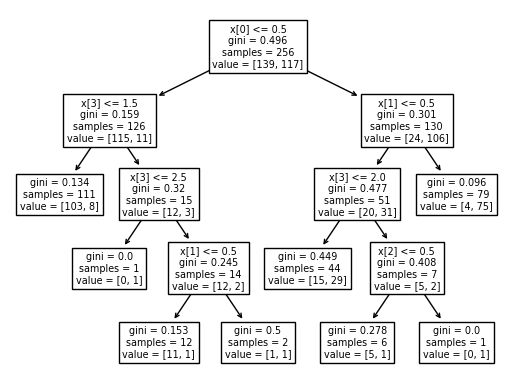

In [ ]:
tree.plot_tree(Clf_min_impurity1);

In [ ]:
y_pred_mpd1 = Clf_min_impurity1.predict (x_test)
print(y_pred_mpd1)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]


In [ ]:
#Checking Accuracy
print ("Accuracy of 0.001 is", accuracy_score (y_test,y_pred_mpd1)*100)

Accuracy of 0.001 is 88.18181818181819


###ลองทำต้นที่ 2




In [ ]:
Clf_min_impurity2 = DecisionTreeClassifier(random_state=100, min_impurity_decrease=0.01)

In [ ]:
Clf_min_impurity2.fit(x_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0.01, random_state=100)

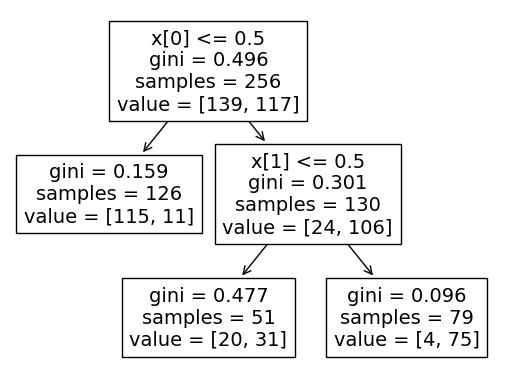

In [ ]:
tree.plot_tree(Clf_min_impurity2);

In [ ]:
y_pred_mpd2 = Clf_min_impurity2.predict (x_test)
print(y_pred_mpd2)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]


In [ ]:
#Checking Accuracy
print ("Accuracy is ", accuracy_score (y_test,y_pred_mpd2)*100)

Accuracy is  89.0909090909091


###ลองทำต้นที่ 3


In [ ]:
min_impurity3 = DecisionTreeClassifier(random_state=100, min_impurity_decrease=0.1)

In [ ]:
min_impurity3.fit(x_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0.1, random_state=100)

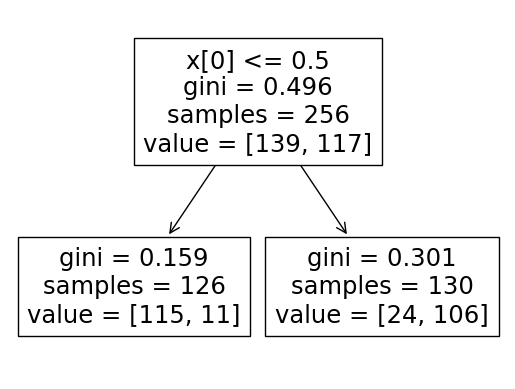

In [ ]:
tree.plot_tree(min_impurity3);

In [ ]:
y_pred_mpd_3 = min_impurity3.predict (x_test)
print(y_pred_mpd_3)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]


In [ ]:
#Checking Accuracy
print ("Accuracy of 0.1 is ", accuracy_score (y_test,y_pred_mpd_3)*100)

Accuracy of 0.1 is  89.0909090909091


###ลองทำต้นที่4

In [ ]:
Clf_min_impurity4= DecisionTreeClassifier (min_impurity_decrease=0.02)

In [ ]:
Clf_min_impurity4.fit(x_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0.02)

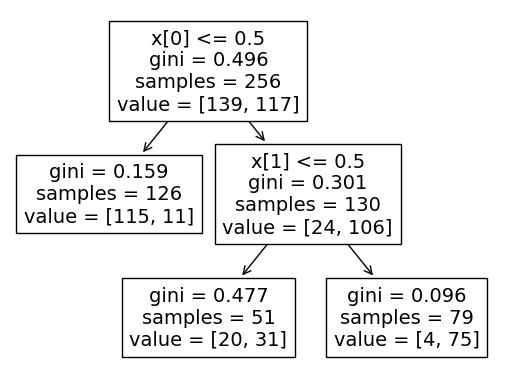

In [ ]:
tree.plot_tree(Clf_min_impurity4);

In [ ]:
y_pred_mpd4 = Clf_min_impurity4.predict (x_test)
print(y_pred_mpd4)

[0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0]


In [ ]:
#Checking Accuracy
print ("Accuracy is ", accuracy_score (y_test,y_pred_mpd4)*100)

Accuracy is  89.0909090909091


#HW4

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'
data1 ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df1 = pd.DataFrame (data1, columns=data1.keys())
print(df1)

           age  income student credit_rate default
0        youth    high      no        fair      no
1        youth    high      no   excellent      no
2   middle_age    high      no        fair     yes
3       senior  medium      no        fair     yes
4       senior     low     yes        fair     yes
5       senior     low     yes   excellent      no
6   middle_age     low     yes   excellent     yes
7        youth  medium      no        fair      no
8        youth     low     yes        fair     yes
9       senior  medium     yes        fair     yes
10       youth  medium     yes   excellent     yes
11  middle_age  medium      no   excellent     yes
12  middle_age    high     yes        fair     yes
13      senior  medium      no   excellent      no


In [ ]:
# STEP 1: Calculate gini(D)
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

class_value_counts = df1[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
yes    9
no     5
Name: default, dtype: int64

Gini Impurity of the class is 0.459


In [ ]:
# STEP 2:
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = df1[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = df1[class_name][df1[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df1.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')


Gini for age is 0.343
Gini for income is 0.440
Gini for student is 0.367
Gini for credit_rate is 0.429


In [ ]:
# STEP 3:
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.343 
The maximum value of Gini Gain     : 0.657 
The selected attiribute is:  age


#test iris

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load a dataset (for illustration, we use the Iris dataset which has 3 classes)
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with a minimum impurity decrease
# Adjust the `min_impurity_decrease` value as per your requirement
min_impurity_decrease_value = 0.01  # Example value, adjust based on your needs
clf = DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease_value, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 100.00%


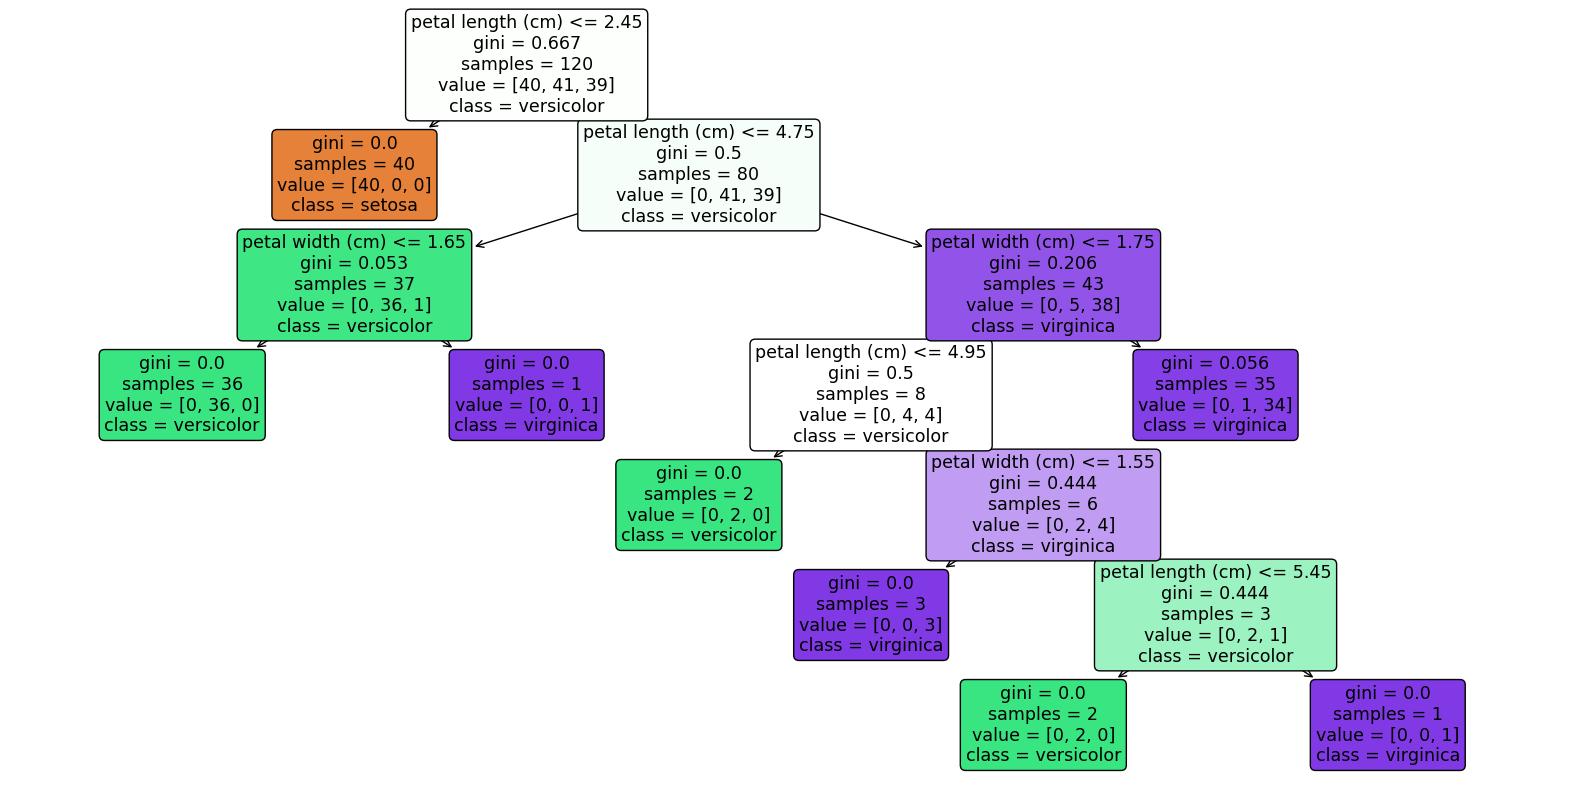

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming `clf` is your trained DecisionTreeClassifier model from the previous example

plt.figure(figsize=(20,10))
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=data.target_names,
          feature_names=data.feature_names)
plt.show()
